# Homework 1: A sinister homework

By the end of this homework, we expect you to be able to:

1. Load data and handle data using pandas;
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy real-world datasets;
4. Aggregate your data in different (and hopefully helpful) ways;
5. Create meaningful visualizations to analyze the data;
6. Communicate your findings in a clear and concise manner


---

## Important Dates
- Homework release: Fri 13 Oct 2023
- **Homework due:** Fri 27 Oct 2023, 23:59
- Grade release: Mon 06 Nov 2023

---

## Some rules
1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)

3. Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.

4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation **(in markdown)**.

5. Back up any hypotheses and claims with data, since this is an important aspect of the course.

6. Please write all your comments in **English**, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. **If there are multiple notebooks present, we will not grade anything.**

7. We will **not run your notebook for you!** Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

8. In continuation to the previous point, interactive plots, such as those generated using the `plotly` package, should be strictly avoided!

9. Make sure to print results and/or dataframes that confirm you have properly addressed the task.


---

##  Context

Congratulations! You have just been hired as a data scientist at "The ByteBlasters", EPFL’s amateur baseball club. The team's manager, Mr. Russo, an eccentric millionaire with an innovative plan to dominate the Swiss baseball league, believes hiring left-handed pitchers (the people who throw the ball) will likely boost the team's performance. Yet, he is concerned about money, as he heard left-handed pitchers have historically earned more!

He tasked you to investigate this "sinister" issue and gave you some openly available data on the birthplace of this beautiful, dynamic sport --- the US.

**About the homework.** This homework consists of four tasks. In Task 0, you will familiarize yourself with the rules of baseball. In Task 1, you will process the data, getting it ready for analysis. In Task 2, you will analyze the data to answer Mr. Russo’s question. Lastly, in Task 3, you will conduct additional analyses that consider the longitudinal nature of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from IPython.display import YouTubeVideo

sns.set_style("whitegrid")

# Task 0 (Ungraded): Baseball 101

**0.1 —** Familiarize yourself with the data; we won't explain the data in-depth in this notebook. Instead, you should take your time to read the readme.txt file inside the data folder. Note that this data is available on [GitHub](https://github.com/chadwickbureau/baseballdatabank).

**0.2 —** Familiarize yourself with basic baseball rules. We will explain everything you need to know, but it will be helpful to get a basic understanding of it. Watching the video below should be enough! (Also available [here](https://www.youtube.com/watch?v=WMA8L5OpuDY).)

A couple of useful things to remember:
- **Pitchers** (try to) throw the ball
- **Batters** (try to) hit the ball with the bat
- **Catchers** (try to) catch the ball.


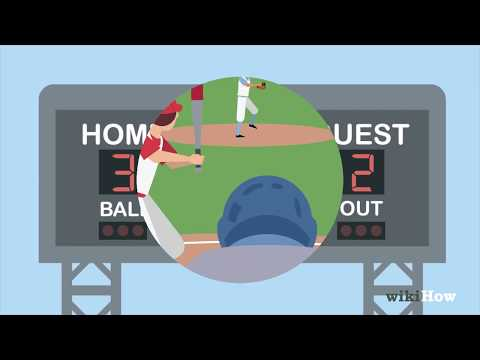

In [2]:
YouTubeVideo('WMA8L5OpuDY', width=800, height=300)

---

# Task 1 (16 pts): Get to Know Your Data

As a good data scientist, you first load the data and perform some small sanity checks on it.

1. You are expected to continuously alter your dataframe as you complete the tasks. E.g., if you are asked to filter the data in a specific task, continue using the filtered dataset in the subsequent tasks.
2. When we tell you to "print the dataframe," make sure you print it in a way that shows the total number of rows and columns in it (`display(df)` should suffice).

---

**1.1 —** Load the `People`, `Salaries`, and `Pitching` dataframes. Then:
- Filter the `Salaries`, and `Pitching` dataframes to remove all data after the year 2010.
- For the `Salaries` dataframe drop all duplicate salaries for players in a given year. In other words, if a player (uniquely identified by `PlayerID`) has multiple salaries in a year (`yearID`), keep the first occurence in the dataframe and drop the remaining.
- Calculate the size of each dataframe. 

Make [deep copies](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html) of all dataframes as you filter them.

Hints:
- 2007 should be included in the data.
- 2010 should be included in the data.
- 2011 should not be included in the data.

- First, we define the `people_df` dataframe, which contains information about the players and check that it has the correct size.

In [3]:
# read in the data from the People.csv file
people_df = pd.read_csv('data/baseballdatabank-2023/core/People.csv')

print("Size of the people_df:", people_df.size, people_df.shape)
people_df.sample(5)

Size of the people_df: 496224 (20676, 24)


,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
5648,faustch01,1880.0,10.0,9.0,USA,KS,Marion,1915.0,6.0,18.0,...,Faust,Charles Victor,NaN,74.0,R,R,1911-10-07,1911-10-12,fausc101,faustch01
8218,herrmed01,1946.0,8.0,27.0,USA,CA,San Diego,2013.0,12.0,22.0,...,Herrmann,Edward Martin,195.0,73.0,L,R,1967-09-01,1978-09-15,herre102,herrmed01
20291,wolteto01,1992.0,6.0,9.0,USA,CA,Vista,NaN,NaN,NaN,...,Wolters,Anthony John,195.0,70.0,L,R,2016-04-05,2022-08-14,woltt001,wolteto01
14667,piattwi01,1874.0,7.0,13.0,USA,OH,Blue Creek,1946.0,9.0,20.0,...,Piatt,Wiley Harold,175.0,70.0,L,L,1898-04-22,1903-08-01,piatw101,piattwi01
11130,luquedo01,1890.0,8.0,4.0,Cuba,La Habana,La Habana,1957.0,7.0,3.0,...,Luque,Adolfo Domingo de Guzman,160.0,67.0,R,R,1914-05-20,1935-04-26,luqud101,luquedo01


We then define the `salaries_df` dataframe, which contains information about the salaries of the players. We filter data after 2010 (`salaries_before_2010_df`) and drop duplicate salaries for players in a given year (`salaries_before_2010_unique_df`). We then check that the dataframe has the correct size.

In [4]:
# read in the data from the Salaries.csv file
salaries_df = pd.read_csv('data/baseballdatabank-2023/contrib/Salaries.csv')
# filter the salaries data to only include the correct years
salaries_before_2010_df = salaries_df[salaries_df.yearID <= 2010].copy(deep=True)
# drop duplicate rows from the salaries data
salaries_before_2010_unique_df = salaries_before_2010_df.drop_duplicates(subset=['playerID', 'yearID'], keep='first').copy(deep=True)

print("Size of salaries_df :", salaries_df.size, salaries_df.shape)
print("Size of salaries_before_2010_df :", salaries_before_2010_df.size, salaries_before_2010_df.shape)
print("Size of salaries_before_2010_unique_df :", salaries_before_2010_unique_df.size, salaries_before_2010_unique_df.shape)
salaries_before_2010_unique_df.sample(5)

Size of salaries_df : 132140 (26428, 5)
Size of salaries_before_2010_df : 107270 (21454, 5)
Size of salaries_before_2010_unique_df : 106755 (21351, 5)


,yearID,teamID,lgID,playerID,salary
11857,1999,MON,NL,seguife01,201500
818,1986,HOU,NL,basske01,310000
14489,2002,NYA,AL,pettian01,9500000
19944,2009,CHA,AL,thomeji01,13000000
6158,1993,MON,NL,shawje01,140000


We check that 2007 and 2010 data are included in `salaries_before_2010_unique_df` and that 2011 data is not included.

In [5]:
assert 2007 in salaries_before_2010_unique_df.yearID.values
assert 2010 in salaries_before_2010_unique_df.yearID.values
assert 2011 not in salaries_before_2010_unique_df.yearID.values

We finally define the `pitching_df` dataframe, which contains information about the pitching of the players. We filter data after 2010 (`pitching_before_2010_df`) and check that the dataframe has the correct size.

In [6]:
# read in the data from the Pitching.csv file
pitching_df = pd.read_csv('data/baseballdatabank-2023/core/Pitching.csv')
# filter the pitching data to only include the correct years
pitching_before_2010_df = pitching_df[pitching_df.yearID <= 2010].copy(deep=True)

print("Size of pitching_df :", pitching_df.size, pitching_df.shape)
print("Size of pitching_before_2010_df:", pitching_before_2010_df.size, pitching_before_2010_df.shape)
pitching_before_2010_df.sample(5)

Size of pitching_df : 1512060 (50402, 30)
Size of pitching_before_2010_df: 1212990 (40433, 30)


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
23903,hausmto01,1982,1,NYN,NL,1,2,21,0,0,...,1.0,1,2.0,0,162.0,12,26,1.0,4.0,3.0
11742,mckeero01,1943,1,PHI,NL,1,0,4,1,1,...,NaN,2,0.0,0,59.0,2,9,NaN,NaN,NaN
37617,ayalalu01,2007,1,WAS,NL,2,2,44,0,0,...,0.0,1,1.0,0,181.0,11,16,3.0,4.0,3.0
19286,eddydo01,1970,1,CHA,AL,0,0,7,0,0,...,0.0,0,0.0,0,48.0,3,4,1.0,0.0,NaN
40378,vanevjo01,2010,1,BOS,AL,0,0,1,0,0,...,0.0,0,0.0,0,5.0,1,2,0.0,0.0,0.0


We check that 2007 and 2010 data are included in `pitching_before_2010_df` and that 2011 data is not included.

In [7]:
assert 2007 in pitching_before_2010_df.yearID.values
assert 2010 in pitching_before_2010_df.yearID.values
assert 2011 not in pitching_before_2010_df.yearID.values

**1.2 —** The `throws` column in the `People` dataframe indicates, for each player, whether they throw with the left ("L") or right hand ("R"). Check what values are in the column and drop rows containing any value that is not "L" or "R," again, make a deep copy when you filter the dataframe.

Hint: Remember NaNs!

We define the `people_df_throwing_hand` dataframe, which contains only valid values for the `throws` column.

In [8]:
# filter people_df by only keeping values of left an right throwers
people_df_throwing_hand = people_df[(people_df.throws == 'R') | (people_df.throws == 'L')].copy(deep=True)

print("Size of people_df :", people_df.size, people_df.shape)
print("Size of people_df_throwing_hand:", people_df_throwing_hand.size, people_df_throwing_hand.shape)
print("Number of dropped rows:", people_df.shape[0] - people_df_throwing_hand.shape[0])
people_df_throwing_hand.sample(5)

Size of people_df : 496224 (20676, 24)
Size of people_df_throwing_hand: 472752 (19698, 24)
Number of dropped rows: 978


,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
19594,watsoar01,1884.0,1.0,11.0,USA,IN,Jeffersonville,1950.0,5.0,9.0,...,Watson,Arthur Stanhope,175.0,70.0,L,R,1914-05-19,1915-08-07,watsa101,watsoar01
18919,turneji01,1903.0,8.0,6.0,USA,TN,Antioch,1998.0,11.0,29.0,...,Turner,James Riley,185.0,72.0,L,R,1937-04-30,1945-09-13,turnj102,turneji01
13845,oliveto01,1903.0,1.0,15.0,USA,AL,Montgomery,1988.0,2.0,26.0,...,Oliver,Thomas Noble,168.0,72.0,R,R,1930-04-14,1933-09-23,olivt101,oliveto01
208,alfarjo01,1993.0,6.0,11.0,Colombia,Sucre,Sincelejo,NaN,NaN,NaN,...,Alfaro,Jorge Mario,230.0,75.0,R,R,2016-09-12,2022-10-05,alfaj002,alfarjo01
16837,semprra01,1931.0,1.0,7.0,USA,OH,Cleveland,NaN,NaN,NaN,...,Semproch,Roman Anthony,180.0,71.0,R,R,1958-04-15,1961-05-02,sempr101,semprra01


**1.3 —** Merge the `People` dataframe with the `Pitching` dataframe. Your merge should populate the pitching data with statistics about the players. Print the resulting dataframe.

We define the `people_pitching_df` dataframe, which adds information about the player in the `pitching_before_2010_df` dataframe.

In [9]:
# merge pitching and people dataframes
people_pitching_df = pd.merge(pitching_before_2010_df, people_df_throwing_hand, on='playerID', how='left')

print("Size of pitching_before_2010_df :", pitching_before_2010_df.size, pitching_before_2010_df.shape)
display(people_pitching_df)

Size of pitching_before_2010_df : 1212990 (40433, 30)


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,Brainard,Asahel,150.0,68.0,NaN,R,1871-05-05,1874-10-14,braia102,brainas01
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,Ferguson,Robert Vavasour,149.0,69.0,B,R,1871-05-18,1884-07-01,fergb101,fergubo01
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,Fisher,William Charles,164.0,69.0,R,R,1871-05-06,1878-07-09,fishc102,fishech01
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40428,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,Zambrano,Carlos Alberto,275.0,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01
40429,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,Ziegler,Brad Gregory,220.0,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01
40430,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,Zimmermann,Jordan Michael,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02
40431,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,Zito,Barry William,205.0,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01


We check that the `people_pitching_df` dataframe has the correct size.

In [10]:
# assert that the number of rows is correct
assert pitching_before_2010_df.shape[0] == people_pitching_df.shape[0]
# asset that the number of columns is correct
assert len(set(pitching_before_2010_df.columns).union(set(people_df_throwing_hand.columns))) == people_pitching_df.shape[1]

**1.4 —** You realize some of the data for the `throws` column is missing! Estimate the percentage of missing data points per year in that column, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 1892.

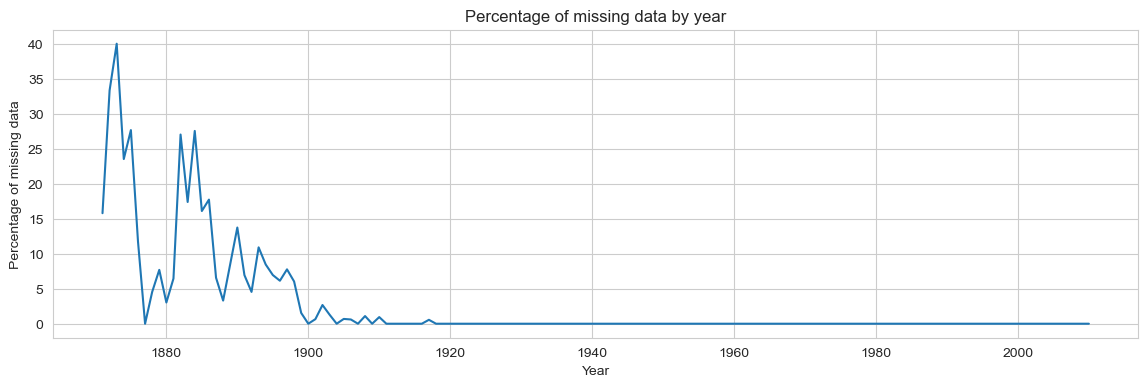

In [11]:
#compute the percentage of missing data by year
people_pitching_missing_data_df = \
    people_pitching_df['throws'].isna().groupby(people_pitching_df['yearID']).sum() / \
        people_pitching_df.groupby('yearID').size() * 100

#plot the percentage of missing data by year
plt.figure(figsize=(14, 4))
ax = sns.lineplot(data=people_pitching_missing_data_df)
ax.set(xlabel='Year', ylabel='Percentage of missing data', title='Percentage of missing data by year')
plt.show()

In [12]:
#print percentage the missing data in 1892
print("Missing throwing data in 1892:", people_pitching_missing_data_df[1892].round(2), "%")

Missing throwing data in 1892: 4.55 %


**1.5 —** Filter the dataset you just merged (hereinafter `Pitching-People`) to just contain data from after 1920 (with 1920 included). Do the same with the `Salaries` dataset. Make deep copies of both dataframes as you filter them.



We define the `people_pitching_after_1920_df` dataframe, which contains only data after 1920.

In [13]:
# filter people_pitching_df to only include rows after 1920
people_pitching_after_1920_df = people_pitching_df[people_pitching_df.yearID >= 1920].copy(deep=True)

print("Size of people_pitching_after_1920_df :", people_pitching_after_1920_df.size, people_pitching_after_1920_df.shape)
print("Number of dropped rows:", people_pitching_df.shape[0] - people_pitching_after_1920_df.shape[0])
people_pitching_after_1920_df.sample(5)

Size of people_pitching_after_1920_df : 1795693 (33881, 53)
Number of dropped rows: 6552


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
27120,navarja01,1989,1,ML4,AL,7,8,19,17,1,...,Navarro,Jaime,210.0,76.0,R,R,1989-06-20,2000-07-26,navaj001,navarja01
28024,hentgpa01,1991,1,TOR,AL,0,0,3,1,0,...,Hentgen,Patrick George,210.0,74.0,R,R,1991-09-03,2004-07-21,hentp001,hentgpa01
7949,levsedu01,1926,1,CLE,AL,16,13,33,31,18,...,Levsen,Emil Henry,180.0,72.0,R,R,1923-09-28,1928-07-31,levsd101,levsedu01
29699,pughti01,1994,1,CIN,NL,3,3,10,9,1,...,Pugh,Timothy Dean,225.0,78.0,R,R,1992-09-01,1997-05-24,pught001,pughti01
11594,wyattwh01,1942,1,BRO,NL,19,7,31,30,16,...,Wyatt,John Whitlow,185.0,73.0,R,R,1929-09-16,1945-07-18,wyatw101,wyattwh01


We define the `salaries_between_1920_2010_unique_df` dataframe, which contains only salaries data between 1920 and 2010.

In [14]:
# filter salaries_before_2010_unique_df to only include data after 1920
salaries_between_1920_2010_unique_df = salaries_before_2010_unique_df[salaries_before_2010_unique_df.yearID >= 1920].copy(deep=True)

print("Size of salaries_between_1920_2010_unique_df :", salaries_between_1920_2010_unique_df.size, salaries_between_1920_2010_unique_df.shape)
print("Number of dropped rows:", salaries_before_2010_unique_df.shape[0] - salaries_between_1920_2010_unique_df.shape[0])
salaries_between_1920_2010_unique_df.sample(5)

Size of salaries_between_1920_2010_unique_df : 106755 (21351, 5)
Number of dropped rows: 0


,yearID,teamID,lgID,playerID,salary
14664,2002,SEA,AL,suzukic01,3696000
11126,1998,SFN,NL,tavarju01,1108334
5686,1993,BOS,AL,harrigr01,1500000
6843,1994,DET,AL,samueju01,400000
11978,1999,PHI,NL,montgst01,200000


**1.6 —**  Merge the `Pitching-People` dataframe with the `Salaries` dataframe. Your merge should populate the `Pitching-People` dataframe with statistics about the pitchers'salaries across the years. Note that the `Salaries` dataframe contains the salary **per year.** Print the resulting dataframe.

We define the `people_pitching_salaries_df` dataframe, which adds information about the player's salaries in the `people_pitching_after_1920_df` dataframe.

In [15]:
# merge people_pitching_after_1920_df and salaries_between_1920_2010_unique_df
people_pitching_salaries_df = pd.merge(people_pitching_after_1920_df, salaries_between_1920_2010_unique_df, on=['playerID', 'yearID'], how='left')
# drop duplicate columns
people_pitching_salaries_df.rename(columns={'teamID_x': 'teamID', 'lgID_x': 'lgID'}, inplace=True)
people_pitching_salaries_df.drop(['teamID_y', 'lgID_y'], axis=1, inplace=True)

print("Size of people_pitching_salaries_df :", people_pitching_salaries_df.size, people_pitching_salaries_df.shape)
display(people_pitching_salaries_df)

Size of people_pitching_salaries_df : 1829574 (33881, 54)


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,acostjo01,1920,1,WS1,AL,5,4,17,5,4,...,Jose,134.0,66.0,R,R,1920-07-28,1922-05-12,acosj101,acostjo01,NaN
1,adamsba01,1920,1,PIT,NL,17,13,35,33,19,...,Charles Benjamin,185.0,71.0,L,R,1906-04-18,1926-08-11,adamb104,adamsba01,NaN
2,alexape01,1920,1,CHN,NL,27,14,46,40,33,...,Grover Cleveland,185.0,73.0,R,R,1911-04-15,1930-05-28,alexg102,alexape01,NaN
3,altener01,1920,1,DET,AL,0,1,14,1,0,...,Ernest Matthias,175.0,72.0,R,L,1920-04-17,1920-06-30,altee101,altener01,NaN
4,ayersdo01,1920,1,DET,AL,7,14,46,23,8,...,Yancey Wyatt,185.0,73.0,R,R,1913-09-09,1921-05-21,ayerd101,ayersdo01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33876,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,Carlos Alberto,275.0,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01,18875000.0
33877,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,Brad Gregory,220.0,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01,410000.0
33878,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,Jordan Michael,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02,NaN
33879,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,Barry William,205.0,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01,18500000.0


We check that the `people_pitching_salaries_df` dataframe has the correct size.

In [16]:
# assert that the number of rows in the merged dataframe is the same as the number of rows in the people_pitching_after_1920_df dataframe
assert people_pitching_after_1920_df.shape[0] == people_pitching_salaries_df.shape[0]
# asset that the number of columns is correct
assert len(set(people_pitching_after_1920_df.columns).union(set(salaries_between_1920_2010_unique_df.columns))) == people_pitching_salaries_df.shape[1]

**1.7 —** You realize some of the data for the `salary` column is missing! Estimate the percentage of missing data points per year, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 2002.


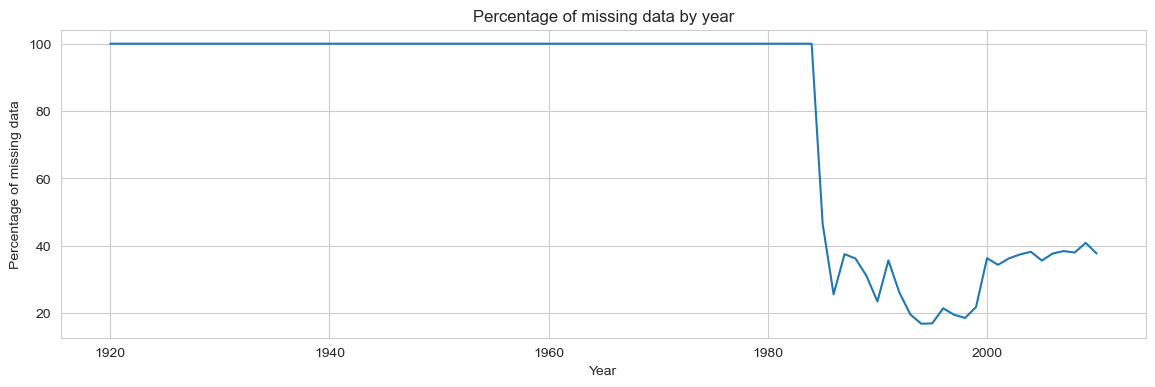

In [17]:
# compute the percentage of missing data by year
people_pitching_salaries_missing_data_percentage_per_year_df = \
    people_pitching_salaries_df['salary'].isna().groupby(people_pitching_salaries_df['yearID']).sum() / \
          people_pitching_salaries_df.groupby('yearID').size() * 100

# plot the percentage of missing data by year
plt.figure(figsize=(14, 4))
ax = sns.lineplot(data=people_pitching_salaries_missing_data_percentage_per_year_df)
ax.set(xlabel='Year', ylabel='Percentage of missing data', title='Percentage of missing data by year')
plt.show()

In [18]:
# print percentage the missing data in 2002
print("Missing salary data in 2002:", people_pitching_salaries_missing_data_percentage_per_year_df[2002].round(2), "%")

Missing salary data in 2002: 36.27 %


**1.8 —** Find and print the first and last year for which there exists any salary data. Filter the resulting, merged dataframe to include only data between these two dates. Again make sure you make a deep copy of the dataframe, and print the resulting dataframe.

To find the first and last year where there exists any salary data we take the minimum and maximum of the index (year) where the percentage is less than 100 % from `people_pitching_salaries_missing_data_percentage_per_year_df`

In [19]:
first_year_with_salary_data = \
    people_pitching_salaries_missing_data_percentage_per_year_df \
    .index[people_pitching_salaries_missing_data_percentage_per_year_df != 100].min()
print("First year with salary data is", first_year_with_salary_data)
last_year_with_salary_data = \
    people_pitching_salaries_missing_data_percentage_per_year_df \
    .index[people_pitching_salaries_missing_data_percentage_per_year_df != 100 ].max()
print("Last year with salary data is", last_year_with_salary_data)

First year with salary data is 1985
Last year with salary data is 2010


Finally, we define the `people_pitching_salaries_with_salarie_df` dataframe, which contains only data between the first and last year for which there exists any salary data.

In [20]:
# keep only rows between first yearID and last yearID with any salary data
people_pitching_salaries_with_salarie_df = people_pitching_salaries_df[(people_pitching_salaries_df.yearID >= first_year_with_salary_data) \
                                & (people_pitching_salaries_df.yearID <= last_year_with_salary_data)].copy(deep=True)

# print the number of dropped rows
print("Number of dropped rows:", people_pitching_salaries_df.shape[0] - people_pitching_salaries_with_salarie_df.shape[0])
print("Size of people_pitching_salaries_with_salarie_df :", people_pitching_salaries_with_salarie_df.size, people_pitching_salaries_with_salarie_df.shape)
display(people_pitching_salaries_with_salarie_df)

Number of dropped rows: 18432
Size of people_pitching_salaries_with_salarie_df : 834246 (15449, 54)


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
18432,aasedo01,1985,1,BAL,AL,10,6,54,0,0,...,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01,NaN
18433,abregjo01,1985,1,CHN,NL,1,1,6,5,0,...,Johnny Ray,185.0,72.0,R,R,1985-09-04,1985-10-03,abrej001,abregjo01,NaN
18434,ackerji01,1985,1,TOR,AL,7,2,61,0,0,...,James Justin,210.0,74.0,R,R,1983-04-07,1992-06-14,ackej001,ackerji01,170000.0
18435,agostju01,1985,1,CHA,AL,4,3,54,0,0,...,Juan Roberto,190.0,74.0,L,L,1981-09-07,1993-06-19,agosj001,agostju01,147500.0
18436,aguilri01,1985,1,NYN,NL,10,7,21,19,2,...,Richard Warren,195.0,76.0,R,R,1985-06-12,2000-09-06,aguir001,aguilri01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33876,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,Carlos Alberto,275.0,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01,18875000.0
33877,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,Brad Gregory,220.0,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01,410000.0
33878,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,Jordan Michael,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02,NaN
33879,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,Barry William,205.0,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01,18500000.0


---

# Task 2 (16 pts)

Task 1, was a softball? Huh? For Task 2, you will use a dataset similar to what you obtained at the end of Task 1. This code loads it.


In [21]:
# PROVIDED CODE
df = pd.read_csv("./data/dataset-task-2.csv")
df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,prietar01,1998,1,OAK,AL,0,1,2,2,0,...,Ariel,220.0,75.0,R,R,1995-07-02,2001-05-10,priea001,prietar01,NaN
1,pooleji02,2000,1,DET,AL,1,0,18,0,0,...,James Richard,190.0,74.0,L,L,1990-06-15,2000-06-01,poolj001,pooleji02,200000.0
2,leecl02,2007,1,CLE,AL,5,8,20,16,1,...,Clifton Phifer,205.0,75.0,L,L,2002-09-15,2014-07-31,lee-c003,leecl02,3000000.0
3,purceda01,2010,1,TOR,AL,1,1,33,0,0,...,David Kent,245.0,77.0,L,L,2008-04-18,2013-09-20,purcd001,purceda01,NaN
4,gundeer01,1992,1,SEA,AL,2,1,9,0,0,...,Eric Andrew,175.0,72.0,R,L,1990-04-11,2000-05-17,gunde001,gundeer01,NaN


Some comments about this dataset:
- This is a sample of the dataset obtained in Task 1. 
- Even if you  did everything correctly for Task 1, this dataframe would contain a different number of rows --- as it is a sample.
- This prevent that mistakes made in Task 1 cascade into Tasks 2 and 3.


With this data, you will proceed to investigate differences in the salaries and performance of left-handed and right-handed pitchers.

---

**2.1 —** Plot the Complementary cumulative distribution function (CCDF) of salary for left-handed and right-handed athletes. Consider data from all years.

We define the `left_right_graph_df` dataframe, which contains the data from the `dataset-task-2.csv` data file. However, we rename the `throws` column to `Throwing hand` and replace the values `L` and `R` by `Left` and `Right` respectively. This will help us for the plotting to come.

In [22]:
# rename throws column to Throwing hand
left_right_graph_df = df.rename(columns={'throws': 'Throwing hand'})
# change R in throws column to Right-handed and L to Left-handed
left_right_graph_df['Throwing hand'] = left_right_graph_df['Throwing hand'].replace({'R': 'Right-handed', 'L': 'Left-handed'})

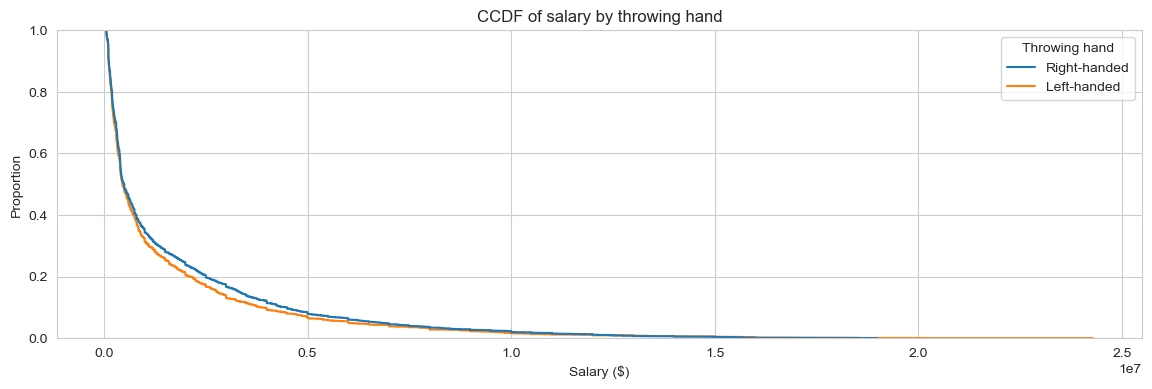

In [23]:
# plot the CCDF of salary by throwing hand
plt.figure(figsize=(14, 4))
sns.ecdfplot(data=left_right_graph_df, x="salary", hue="Throwing hand", complementary=True)
plt.xlabel("Salary ($)")
plt.title("CCDF of salary by throwing hand")
plt.show()

**2.2 —** /Discuss:/ This plot has an issue which severely limits the amount of information one can draw from it. Describe the issue and propose a solution to address it.

- The plot's issue is that the salaries distribution is highly positively skewed, some players earn significantly more than other players. Most of salaries (90%) are below 5 million dollars. The CCDF lines for both left handed and right handed players drop very quickly to zero so we lose a lot of information about how the salaries are distributed.
- The solution to this issue is to use a logarithmic scale on both the x and y axis.
- The data could follow a power law distribution because both right-handed and left-handed player salaries decay rapidly and then flattens out. This behaviour is characteristic power-law distribution. To check this we can plot the CCDF on a log-log scale and see if the data follows a straight line.

**2.3 —** Implement the solution proposed by yourself in the previous question.

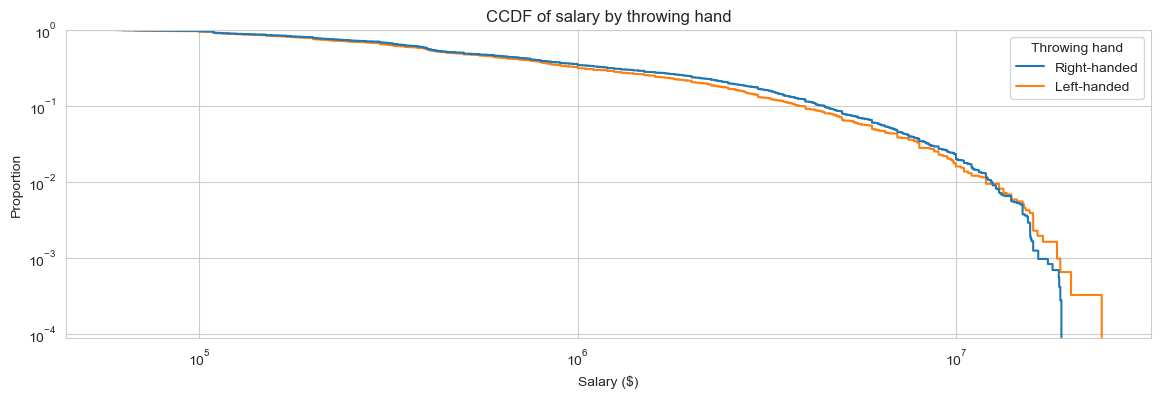

In [24]:
# plot the distribution of salary by throwing hand
plt.figure(figsize=(14, 4))
sns.ecdfplot(data=left_right_graph_df, x="salary", hue="Throwing hand", complementary=True, log_scale=(True, True))
plt.title("CCDF of salary by throwing hand")
plt.xlabel("Salary ($)")
plt.show()

**2.4 —** /Discuss:/ Considering this second version of the plot, describe what the plot shows with regard to the distribution of salaries from left- and right-handed pitchers.

- We can see that the salaries for left and right players do not follow a power law distribution since the CCDF lines are not straight lines.
- The plot shows that both left-handed and right-handed players seem to follow a similar power law distribution pattern.
- The top 1% highest paid left-handed players earn more than the top 1% of the right-handed players.

$\Longrightarrow$ From the above plot, we can deduce that for 99% of the players, the salaries of left-handed and right-handed players are similar. However, the top 1% of the left-handed players earn more than the top 1% of the right-handed players.

**2.5—** Calculate the mean and the 95% confidence interval for the salary of left-handed and right-handed pitchers aggregating data across all years. Print the estimates. Additionally, present the estimates and the confidence intervals in a [point plot](https://seaborn.pydata.org/_images/pointplot_7_0.png). Calculate your confidence intervals using the standard error of the mean and ignoring missing values.

We define the `left_handed_df` dataframe, which contains only left-handed players data.

In [25]:
# define the left-handed dataframe
left_handed_df = df[df.throws == 'L']
left_handed_df.sample(5)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
10081,koronjo01,2006,1,TEX,AL,7,7,23,23,0,...,John Vincent,200.0,72.0,L,L,2005-06-01,2009-05-17,koroj001,koronjo01,329000.0
14721,vanhean01,2002,1,DET,AL,1,3,5,5,1,...,Andrew William,185.0,75.0,R,L,2002-09-03,2002-09-27,vanha001,vanhean01,NaN
3112,ruckeda01,1986,1,PHI,NL,0,2,19,0,0,...,David Michael,185.0,73.0,L,L,1981-04-12,1988-10-02,ruckd001,ruckeda01,NaN
4302,honeyri01,1988,1,OAK,AL,3,2,55,0,0,...,Frederick Wayne,185.0,73.0,L,L,1977-08-24,1997-05-02,honer001,honeyri01,855000.0
8301,darenvi01,1999,1,FLO,NL,0,1,56,0,0,...,Victor Anthony,165.0,70.0,L,L,1998-04-01,2005-09-28,darev001,darenvi01,265000.0


We also define the `right_handed_df` dataframe, which contains only right-handed players data.

In [26]:
# define the right-handed dataframe
right_handed_df = df[df.throws == 'R']
right_handed_df.sample(5)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
11835,jonesba01,1992,2,NYN,NL,2,0,17,0,0,...,Barry Louis,225.0,76.0,R,R,1986-07-18,1993-05-22,joneb002,jonesba01,1025000.0
153,moorema01,1993,1,COL,NL,3,1,27,0,0,...,Marcus Braymont,195.0,77.0,B,R,1993-07-09,1996-06-05,moorm002,moorema01,NaN
2341,mccutda01,2010,1,PIT,NL,2,5,28,9,0,...,Daniel Thomas,215.0,74.0,R,R,2009-08-31,2014-04-04,mccud001,mccutda01,401500.0
3249,dewitma01,2001,1,TOR,AL,0,2,16,0,0,...,Matthew Brian,220.0,76.0,R,R,2000-06-20,2002-05-02,dewim001,dewitma01,NaN
13058,reithbr01,2001,1,CIN,NL,0,7,9,8,0,...,Brian Eric,220.0,77.0,R,R,2001-05-16,2004-06-14,reitb001,reithbr01,NaN


We define the `left_right_handed_salaries_df` dataframe, which contains the mean for the salary of left-handed and right-handed pitchers aggregating data across all years. We transform the salaries in millions of dollars for convenience.

In [27]:
# create a dataframe with the mean salary for each throwing hand
left_right_handed_salaries_df = \
    pd.DataFrame({'Left-handed': left_handed_df.salary / 1000000, 'Right-handed': right_handed_df.salary / 1000000})

We will use the `bootstraping` method to compute confidence intervals.
We therefore define the number of bootstrap samples to use the rest of the homework.

In [28]:
# define the number of bootstrap samples
num_boot_samples = 10000

In [29]:
# compute the mean salary for each throwing hand
left_handed_salaries_mean = np.mean(left_right_handed_salaries_df['Left-handed'])
right_handed_salaries_mean = np.mean(left_right_handed_salaries_df['Right-handed'])

# compute 95% confidence intervals 
left_handed_bootstrap_salaries_means = \
    [left_right_handed_salaries_df['Left-handed'].sample(frac=1, replace=True).mean() for _ in range(num_boot_samples)]
right_handed_bootstrap_salaries_means = \
    [left_right_handed_salaries_df['Right-handed'].sample(frac=1, replace=True).mean() for _ in range(num_boot_samples)]

# calculate 95% confidence intervals for left-handed and right-handed players
left_handed_salaries_95ci = np.percentile(left_handed_bootstrap_salaries_means, [2.5, 97.5])
right_handed_salaries_95ci = np.percentile(right_handed_bootstrap_salaries_means, [2.5, 97.5])

print(f"Mean salary for left-handed players: {left_handed_salaries_mean:.3f} M$, 95% CI = ({left_handed_salaries_95ci[0]:.3f} M$, {left_handed_salaries_95ci[1]:.3f} M$)")
print(f"Mean salary for right-handed players: {right_handed_salaries_mean:.3f} M$, 95% CI = ({right_handed_salaries_95ci[0]:.3f} M$, {right_handed_salaries_95ci[1]:.3f} M$)")

Mean salary for left-handed players: 1.437 M$, 95% CI = (1.355 M$, 1.522 M$)
Mean salary for right-handed players: 1.597 M$, 95% CI = (1.541 M$, 1.655 M$)


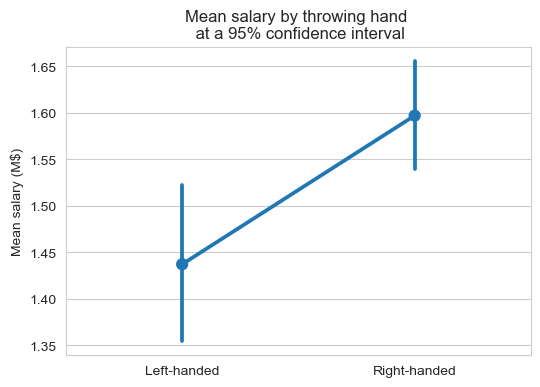

In [30]:
# plot the mean salary for each throwing hand
plt.figure(figsize=(6, 4))
sns.pointplot(data=left_right_handed_salaries_df, errorbar=("ci", 95), n_boot=num_boot_samples)

plt.title("Mean salary by throwing hand \n at a 95% confidence interval")
plt.ylabel("Mean salary (M$)")
plt.grid(axis='y', linestyle='-')
plt.show()

**2.6 —** /Discuss:/ Can you tell whether the difference between the two distributions is statistically significant (at the .05 level of significance) from the image? Why?

From the graph, the confidence intervals for the two groups do not appear to overlap, which suggests that the mean salaries for the two groups are different. We observe that 95% of the right-handed pitchers earn more than 95% of the left-handed pitchers. We can conclude that the difference between the two distributions is statistically significant from the image.

**2.7 —** Perform a t-test test comparing the salaries of left-handed and right-handed pitchers at the .05 level of significance. Consider data from all years. /Discuss:/ Who earns more?

We perform a t-test tests comparing the salaries of left-handed and right-handed pitchers at the .05 level of significance assuming both equal variances and unequal variances.

In [31]:
#t-test of left- and right-handed pitchers without equal variance assumption
t_stat, p_value = stats.ttest_ind(left_right_handed_salaries_df["Left-handed"], 
                left_right_handed_salaries_df["Right-handed"], equal_var=False, nan_policy='omit')
print("t_stat =", t_stat)
print("p_value =", p_value)

t_stat = -3.061326258709391
p_value = 0.0022133085934849233


- The p-value is 0.002, which is less than 0.05. We can reject the null hypothesis that the salary is the same.

In [32]:
#t-test of left- and right-handed pitchers with equal variance assumption
t_stat, p_value = stats.ttest_ind(left_right_handed_salaries_df["Left-handed"], 
                left_right_handed_salaries_df["Right-handed"], equal_var=True, nan_policy='omit')
print("t_stat =", t_stat)
print("p_value =", p_value)

t_stat = -3.0106974397099364
p_value = 0.0026128052505379083


- The p-value is 0.002, which is less than 0.05. We can reject the null hypothesis that the salary is the same.

Since we can reject the null hypothesis that the mean salaries are the same for left-handed and right-handed pitchers, therefore we can say that there is a significant difference between the salaries of left-handed and right-handed pitchers.
This confirms our previous conclusion that the difference between the two distributions is statistically significant and we can conclude that right-handed pitchers earn more than left-handed pitchers.

---

Now, let's turn to analyzing performance. A commonly used metric to evaluate the skill of a pitcher is to look at the batting average of the pitcher’s opponents. According to [Wikipedia](https://en.wikipedia.org/wiki/Batting_average_against),

> In baseball statistics, batting average against (denoted by BAA or AVG), also known as opponents' batting average (denoted by OBA), is a statistic that measures a pitcher's ability to prevent hits during official at bats. It can alternatively be described as the league's hitters' combined batting average against the pitcher.

The intuition is clear: if you are a pitcher, you do not want the batter actually to hit the ball. Thus, if you are a good pitcher, the opponent batter should miss a lot against you! Conveniently, this is already calculated on a yearly basis in our data.

---

**2.8 —** Considering data from all years, calculate the mean opponents' batting average for left- and right-handed pitchers. Run a t-test test to determine if this difference is statistically significant at the .05 level of significance. **Consider only pitchers in the years during which they have played atleast 5 games.** /Discuss:/ According to this approach, who are the better pitchers? Left-handed or right-handed pitchers?

In [33]:
# consider only pitchers with at least 5 games played
left_handed_atleast_5_games_df = left_handed_df[left_handed_df.G >= 5]
print("Number of dropped rows in left_handed_df:", left_handed_df.shape[0] - left_handed_atleast_5_games_df.shape[0])
right_handed_atleast_5_games_df = right_handed_df[right_handed_df.G >= 5]
print("Number of dropped rows in right_handed_df:", right_handed_df.shape[0] - right_handed_atleast_5_games_df.shape[0])

Number of dropped rows in left_handed_df: 521
Number of dropped rows in right_handed_df: 1408


We define the `left_right_handed_oba_df` dataframe, which contains the mean opponents' batting average for left- and right-handed pitchers. We transform the mean opponents' batting average to percentages for convenience.

In [34]:
# create a dataframe with the mean opponents batting average for each throwing hand
left_right_handed_oba_df = \
    pd.DataFrame({'Left-handed': left_handed_atleast_5_games_df.BAOpp * 100, 
                  'Right-handed': right_handed_atleast_5_games_df.BAOpp * 100})

In [35]:
# compute the mean opponents batting average for each throwing hand
left_handed_oba_mean = np.mean(left_right_handed_oba_df['Left-handed'])
right_handed_oba_mean = np.mean(left_right_handed_oba_df['Right-handed'])

# compute 95% confidence intervals for left-handed and right-handed players
left_handed_bootstrap_oba_means = \
    [left_right_handed_oba_df['Left-handed'].sample(frac=1, replace=True).mean() for _ in range(num_boot_samples)]
right_handed_bootstrap_oba_means = \
    [left_right_handed_oba_df['Right-handed'].sample(frac=1, replace=True).mean() for _ in range(num_boot_samples)]

# calculate 95% confidence intervals for left-handed and right-handed players
left_handed_oba_95ci = np.percentile(left_handed_bootstrap_oba_means, [2.5, 97.5])
right_handed_oba_95ci = np.percentile(right_handed_bootstrap_oba_means, [2.5, 97.5])

print(f"Mean opponents batting average for left-handed players: {left_handed_oba_mean:.2f} %, 95% CI = ({left_handed_oba_95ci[0]:.2f} %, {left_handed_oba_95ci[1]:.2f} %)")
print(f"Mean opponents batting average for right-handed players: {right_handed_oba_mean:.2f} %, 95% CI = ({right_handed_oba_95ci[0]:.2f} %, {right_handed_oba_95ci[1]:.2f} %)")

Mean opponents batting average for left-handed players: 27.04 %, 95% CI = (26.88 %, 27.20 %)
Mean opponents batting average for right-handed players: 26.78 %, 95% CI = (26.69 %, 26.88 %)


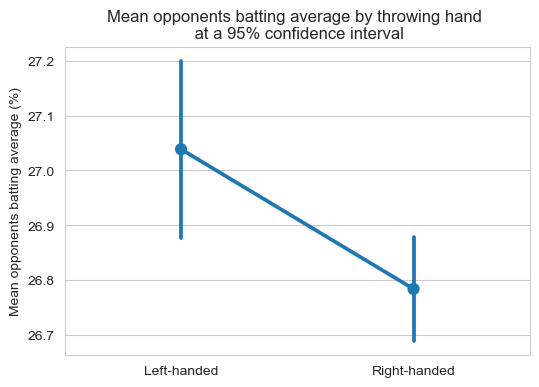

In [36]:
# plot the mean opponents batting average for each throwing hand
plt.figure(figsize=(6, 4))
sns.pointplot(data=left_right_handed_oba_df, errorbar=("ci", 95), n_boot=num_boot_samples)
plt.title("Mean opponents batting average by throwing hand \n at a 95% confidence interval")
plt.ylabel("Mean opponents batting average (%)")
plt.grid(axis='y', linestyle='-')
plt.show()

From the graph, the confidence intervals for the two groups appear to slightly overlap, which suggests that the mean opponents' batting average for the left-handed and right-handed pitchers are similar. We can confirm this by performing a t-test test to determine if this difference is statistically significant at the .05 level of significance.

We perform a t-test tests comparing the mean opponents' batting average for left- and right-handed pitchers at the .05 level of significance assuming both equal variances and unequal variances.

In [37]:
#t-test of left- and right-handed pitchers without equal variance assumption
t_stat, p_value = stats.ttest_ind(left_handed_atleast_5_games_df["BAOpp"], 
                                  right_handed_atleast_5_games_df["BAOpp"], equal_var=False, nan_policy='omit')
print("t_stat =", t_stat)
print("p_value =", p_value)

t_stat = 2.648751627321939
p_value = 0.008097976638277517


- The p-value is 0.008, which is less than 0.05. We can reject the null hypothesis that the opponents batting average is the same.

In [38]:
#t-test of left- and right-handed pitchers with equal variance assumption
t_stat, p_value = stats.ttest_ind(left_handed_atleast_5_games_df["BAOpp"], 
                                  right_handed_atleast_5_games_df["BAOpp"], equal_var=True, nan_policy='omit')
print("t_stat =", t_stat)
print("p_value =", p_value)

t_stat = 2.7523037123322776
p_value = 0.00592593162655335


- The p-value is 0.005, which is less than 0.05. We can reject the null hypothesis that the opponents batting average is the same.

Based on the t-test there is a significant difference between the mean opponents batting average of left-handed and right-handed pitchers at the 95% confidence level, since we can reject the null hypothesis that the mean salaries are the same for left-handed and right-handed pitchers. The mean opponents batting average of right-handed pitchers is lower than the mean opponents batting average of left-handed pitchers. Therefore, right-handed pitchers are shown to be more effective (or better) according to this metric.

# Task 3 (18 pts)

Before you report your results to Mr. Russo, you decide to run them by your favorite Applied Data Analysis' TA, Ms. Sakota. She seems skeptical! According to her, you should take into account the time variable!

**3.1 —** Repeat the analysis from tasks 2.7 and 2.8 considering only data from the year 2000. That is, use a t-test to determine the distribution of salaries (2.7) and opponents' batting average (2.8) for all data of the year 2000 only. 

We define the `left_handed_2000_df` dataframe, which contains only left-handed players data from the year 2000.

In [39]:
# define the left-handed dataframe of the year 2000
left_handed_2000_df = left_handed_df[left_handed_df.yearID == 2000]
# print the number of dropped rows
print("Number of dropped rows:", left_handed_df.shape[0] - left_handed_2000_df.shape[0])
left_handed_2000_df.sample(5)

Number of dropped rows: 4206


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
5409,johnsra05,2000,1,ARI,NL,19,7,35,35,8,...,Randall David,225.0,82.0,R,L,1988-09-15,2009-10-04,johnr005,johnsra05,13350000.0
13988,sanchje01,2000,1,FLO,NL,9,12,32,32,2,...,Jesus Paulino,165.0,70.0,L,L,1998-03-31,2004-07-15,sancj001,sanchje01,265000.0
10538,cookde01,2000,1,NYN,NL,6,3,68,0,0,...,Dennis Bryan,185.0,75.0,L,L,1988-09-12,2002-09-18,cookd001,cookde01,2200000.0
3132,chenbr01,2000,1,ATL,NL,4,0,22,0,0,...,Bruce Kastulo,215.0,74.0,L,L,1998-09-07,2015-05-15,chenb001,chenbr01,207500.0
14595,chenbr01,2000,2,PHI,NL,3,4,15,15,0,...,Bruce Kastulo,215.0,74.0,L,L,1998-09-07,2015-05-15,chenb001,chenbr01,207500.0


We also define the `right_handed_2000_df` dataframe, which contains only right-handed players data from the year 2000.

In [40]:
# define the right-handed dataframe of the year 2000
right_handed_2000_df = right_handed_df[right_handed_df.yearID == 2000]
# print the number of dropped rows
print("Number of dropped rows:", right_handed_df.shape[0] - right_handed_2000_df.shape[0])
right_handed_2000_df.sample(5)

Number of dropped rows: 10125


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
6706,reedri01,2000,1,NYN,NL,11,5,30,30,0,...,Richard Allen,195.0,72.0,R,R,1988-08-08,2003-09-26,reedr002,reedri01,4375000.0
13295,johnsma03,2000,1,DET,AL,0,1,9,3,0,...,Mark Joseph,226.0,75.0,R,R,2000-04-07,2000-06-24,johnm004,johnsma05,200000.0
5980,sparkst01,2000,1,DET,AL,7,5,20,15,1,...,Steven William,187.0,72.0,R,R,1995-04-28,2004-09-26,spars001,sparkst01,NaN
10696,gintema01,2000,1,CHA,AL,1,0,7,0,0,...,Matthew Shane,215.0,73.0,R,R,2000-09-01,2008-08-03,gintm001,gintema01,NaN
11862,ratlijo01,2000,1,OAK,AL,0,0,1,0,0,...,Jon Charles,195.0,76.0,R,R,2000-09-15,2000-09-15,ratlj001,ratlijo01,NaN


We define the `left_right_handed_salaries_2000_df` dataframe, which contains the mean for the salary of left-handed and right-handed pitchers from the year 2000. We transform the salaries in millions of dollars for convenience.

In [41]:
# create a dataframe with the salaries for each throwing hand divided by 1 million to get salaries in millions
left_right_handed_salaries_2000_df = \
    pd.DataFrame({'Left-handed': left_handed_2000_df.salary / 1000000, 
                  'Right-handed': right_handed_2000_df.salary / 1000000})

In [42]:
# compute the mean salary for each throwing hand in year 2000
left_handed_salaries_2000_mean = np.mean(left_right_handed_salaries_2000_df['Left-handed'])
right_handed_salaries_2000_mean = np.mean(left_right_handed_salaries_2000_df['Right-handed'])

# compute 95% confidence intervals for left-handed and right-handed players in year 2000
left_handed_bootstrap_salaries_2000_means = \
    [left_right_handed_salaries_2000_df['Left-handed'].sample(frac=1, replace=True).mean() for _ in range(num_boot_samples)]
right_handed_bootstrap_salaries_2000_means = \
    [left_right_handed_salaries_2000_df['Right-handed'].sample(frac=1, replace=True).mean() for _ in range(num_boot_samples)]

# calculate 95% confidence intervals for left-handed and right-handed players in year 2000
left_handed_salaries_2000_95ci = np.percentile(left_handed_bootstrap_salaries_2000_means, [2.5, 97.5])
right_handed_salaries_2000_95ci = np.percentile(right_handed_bootstrap_salaries_2000_means, [2.5, 97.5])

print(f"Mean salary for left-handed players: {left_handed_salaries_2000_mean:.3f} M$, 95% CI = ({left_handed_salaries_2000_95ci[0]:.3f} M$, {left_handed_salaries_2000_95ci[1]:.3f} M$)")
print(f"Mean salary for right-handed players: {right_handed_salaries_2000_mean:.3f} M$, 95% CI = ({right_handed_salaries_2000_95ci[0]:.3f} M$, {right_handed_salaries_2000_95ci[1]:.3f} M$)")

Mean salary for left-handed players: 1.745 M$, 95% CI = (1.338 M$, 2.198 M$)
Mean salary for right-handed players: 1.839 M$, 95% CI = (1.581 M$, 2.107 M$)


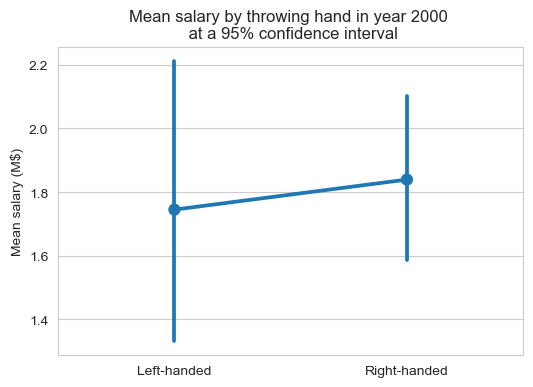

In [43]:
# plot the salaries for each throwing hand
plt.figure(figsize=(6, 4))
sns.pointplot(data=left_right_handed_salaries_2000_df, errorbar=("ci", 95), n_boot=num_boot_samples)
plt.title("Mean salary by throwing hand in year 2000 \n at a 95% confidence interval")
plt.ylabel("Mean salary (M$)")
plt.grid(axis='y', linestyle='-')
plt.show()

We perform a t-test tests comparing the salaries of left-handed and right-handed pitchers at the .05 level of significance assuming both equal variances and unequal variances for the year 2000.

In [44]:
# t-test of left- and right-handed pitchers in year 2000 without equal variance assumption
t_stat, p_value = stats.ttest_ind(left_right_handed_salaries_2000_df["Left-handed"],
                left_right_handed_salaries_2000_df["Right-handed"], equal_var=False, nan_policy='omit')
print("t_stat =", t_stat)
print("p_value =", p_value)

t_stat = -0.3656034104835134
p_value = 0.7150532224665263


- The p-value is 0.715, which is larger than 0.05. We cannot reject the null hypothesis that the income is the same.

In [45]:
# t-test of left- and right-handed pitchers in year 2000 with equal variance assumption
t_stat, p_value = stats.ttest_ind(left_right_handed_salaries_2000_df["Left-handed"],
                left_right_handed_salaries_2000_df["Right-handed"], equal_var=True, nan_policy='omit')
print("t_stat =", t_stat)
print("p_value =", p_value)

t_stat = -0.36821457224243115
p_value = 0.7128996415072705


- The p-value is 0.712, which is larger than 0.05. We cannot reject the null hypothesis that the income is the same.

We cannot reject the null hypothesis. We can therefore conclude that there is no significant difference between the mean salaries of left-handed and right-handed pitchers at the 95% confidence level in the year 2000.
This result contradicts the 2.7 result.

We define the `left_handed_atleast_5_games_2000_df` dataframe, which contains only left-handed players data from the year 2000 with at least 5 games.

In [46]:
# consider only left-handed pitchers with at least 5 games played in year 2000
left_handed_atleast_5_games_2000_df = left_handed_2000_df[left_handed_2000_df.G >= 5]
# print the number of dropped rows
print("Number of dropped rows:", left_handed_2000_df.shape[0] - left_handed_atleast_5_games_2000_df.shape[0])
left_handed_atleast_5_games_2000_df.sample(5)

Number of dropped rows: 25


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
5667,ankieri01,2000,1,SLN,NL,11,7,31,30,0,...,Richard Alexander,210.0,73.0,L,L,1999-08-23,2013-06-08,ankir001,ankieri01,202500.0
8181,byrdati01,2000,1,KCA,AL,0,1,12,0,0,...,Timothy Christopher,190.0,71.0,L,L,1998-08-07,2013-09-26,byrdt001,byrdati01,NaN
9806,villoro01,2000,1,CIN,NL,10,10,35,23,2,...,Ronald Thomas,245.0,75.0,L,L,1995-04-28,2009-10-04,villr001,villoro01,1600000.0
12622,watsoma01,2000,1,CLE,AL,0,1,6,0,0,...,Mark Bradford,215.0,76.0,R,L,2000-05-19,2003-08-21,watsm001,watsoma03,NaN
7813,remlimi01,2000,1,ATL,NL,5,3,71,0,0,...,Michael John,195.0,72.0,L,L,1991-06-15,2006-06-22,remlm001,remlimi01,1400000.0


We define the `right_handed_atleast_5_games_2000_df` dataframe, which contains only right-handed players data from the year 2000 with at least 5 games.

In [47]:
# consider only right-handed pitchers with at least 5 games played in year 2000
right_handed_atleast_5_games_2000_df = right_handed_2000_df[right_handed_2000_df.G >= 5]
# print the number of dropped rows
print("Number of dropped rows:", right_handed_2000_df.shape[0] - right_handed_atleast_5_games_2000_df.shape[0])
right_handed_atleast_5_games_2000_df.sample(5)

Number of dropped rows: 61


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
12407,kamiesc01,2000,2,ATL,NL,2,1,26,0,0,...,Scott Andrew,195.0,72.0,R,R,1991-06-18,2000-10-01,kamis001,kamiesc01,1850000.0
3016,martipe02,2000,1,BOS,AL,18,6,29,29,7,...,Pedro Jaime,170.0,71.0,R,R,1992-09-24,2009-09-30,martp001,martipe02,11500000.0
6178,dingmcr01,2000,1,NYA,AL,0,0,10,0,0,...,Craig Allen,215.0,76.0,R,R,2000-06-30,2005-09-28,dingc001,dingmcr01,NaN
3781,nenro01,2000,1,SFN,NL,4,3,68,0,0,...,Robert Allen,200.0,76.0,R,R,1993-04-10,2002-09-28,nen-r001,nenro01,5500000.0
10755,brockch01,2000,1,PHI,NL,7,8,63,5,0,...,Terrence Christopher,175.0,72.0,R,R,1997-06-11,2002-09-28,brocc001,brockch01,250000.0


We define the `left_right_handed_oba_2000_df` dataframe, which contains the mean opponents' batting average for left- and right-handed pitchers from the year 2000. We transform the mean opponents' batting average to percentages for convenience.

In [48]:
# create a dataframe with the mean opponents batting average for each throwing hand
left_right_handed_oba_2000_df = \
    pd.DataFrame({'Left-handed': left_handed_atleast_5_games_2000_df.BAOpp * 100, 
                  'Right-handed': right_handed_atleast_5_games_2000_df.BAOpp * 100})

In [49]:
# compute the mean opponents batting average for each throwing hand in year 2000
left_handed_oba_mean = np.mean(left_right_handed_oba_2000_df['Left-handed'])
right_handed_oba_mean = np.mean(left_right_handed_oba_2000_df['Right-handed'])

# compute 95% confidence intervals
left_handed_bootstrap_oba_means = \
    [left_right_handed_oba_2000_df['Left-handed'].sample(frac=1, replace=True).mean() for _ in range(num_boot_samples)]
right_handed_bootstrap_oba_means = \
    [left_right_handed_oba_2000_df['Right-handed'].sample(frac=1, replace=True).mean() for _ in range(num_boot_samples)]

# calculate 95% confidence intervals for left-handed and right-handed players
left_handed_oba_95ci = np.percentile(left_handed_bootstrap_oba_means, [2.5, 97.5])
right_handed_oba_95ci = np.percentile(right_handed_bootstrap_oba_means, [2.5, 97.5])

print(f"Mean opponents batting average for left-handed players: {left_handed_oba_mean:.2f} %, 95% CI = ({left_handed_oba_95ci[0]:.2f} %, {left_handed_oba_95ci[1]:.2f} %)")
print(f"Mean opponents batting average for right-handed players: {right_handed_oba_mean:.2f} %, 95% CI = ({right_handed_oba_95ci[0]:.2f} %, {right_handed_oba_95ci[1]:.2f} %)")

Mean opponents batting average for left-handed players: 27.74 %, 95% CI = (26.78 %, 28.76 %)
Mean opponents batting average for right-handed players: 27.65 %, 95% CI = (27.20 %, 28.11 %)


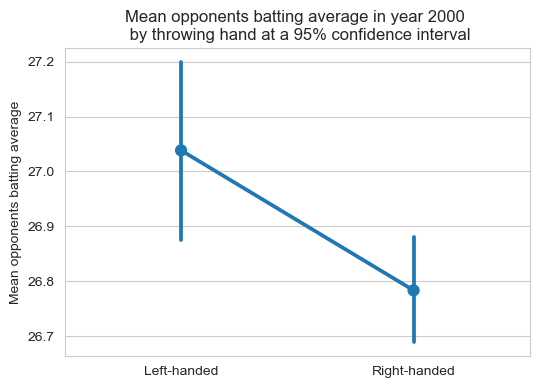

In [50]:
# plot the mean opponents batting average for each throwing hand
plt.figure(figsize=(6, 4))
sns.pointplot(data=left_right_handed_oba_df, errorbar=("ci", 95), n_boot=num_boot_samples)
plt.title("Mean opponents batting average in year 2000 \n by throwing hand at a 95% confidence interval")
plt.ylabel("Mean opponents batting average")
plt.grid(axis='y', linestyle='-')
plt.show()

We perform a t-test tests comparing the mean opponents' batting average for left- and right-handed pitchers at the .05 level of significance assuming both equal variances and unequal variances for the year 2000.

In [51]:
# t-test of left- and right-handed pitchers in year 2000 without equal variance assumption
t_stat, p_value = stats.ttest_ind(left_handed_atleast_5_games_2000_df["BAOpp"],
                right_handed_atleast_5_games_2000_df["BAOpp"], equal_var=False, nan_policy='omit')
print("t_stat =", t_stat)
print("p_value =", p_value)

t_stat = 0.1566712039081948
p_value = 0.8756487118716199


- The p-value is 0.876, which is larger than 0.05. We cannot reject the null hypothesis that the income is the same.

In [52]:
# t-test of left- and right-handed pitchers in year 2000 with equal variance assumption
t_stat, p_value = stats.ttest_ind(left_right_handed_salaries_2000_df["Left-handed"],
                left_right_handed_salaries_2000_df["Right-handed"], equal_var=True, nan_policy='omit')
print("t_stat =", t_stat)
print("p_value =", p_value)

t_stat = -0.36821457224243115
p_value = 0.7128996415072705


- The p-value is 0.712, which is larger than 0.05. We cannot reject the null hypothesis that the income is the same.

We cannot reject the null hypothesis. We can therefore conclude that there is no significant difference between the mean opponents batting average of left-handed and right-handed pitchers at the 95% confidence level in the year 2000.
This result contradicts the results from 2.8.

We get contradictory results for the year 2000 compared to the results obtained for all years (in 2.7 and 2.8). We should investigate further to understand why we get these contradictory results.

**3.2 —** Create a single plot with 14 inches of width and 4 inches of height. The plot should contain three panels:
- Panel A: The percentage of left-handed pitchers per year;
- Panel B: The average salary of all pitchers per year
- Panel C: The average opponents' batting average of all pitchers per year.

Additionally, print, for the year 2007:
- the percentage of left-handed pitchers.
- the average salary.
- the average  opponents' batting average.

We define the `left_handed_percentage_df` dataframe, which contains the percentage of left-handed pitchers per year.

In [53]:
# compute the percentage of left-handed pitchers by year
left_handed_percentage_df = left_handed_df.groupby('yearID').size() / df.groupby('yearID').size() * 100

left_handed_percentage_df.sample(5)

yearID
1988    32.432432
1989    32.432432
1998    29.654036
1987    32.891832
2004    26.106870
dtype: float64

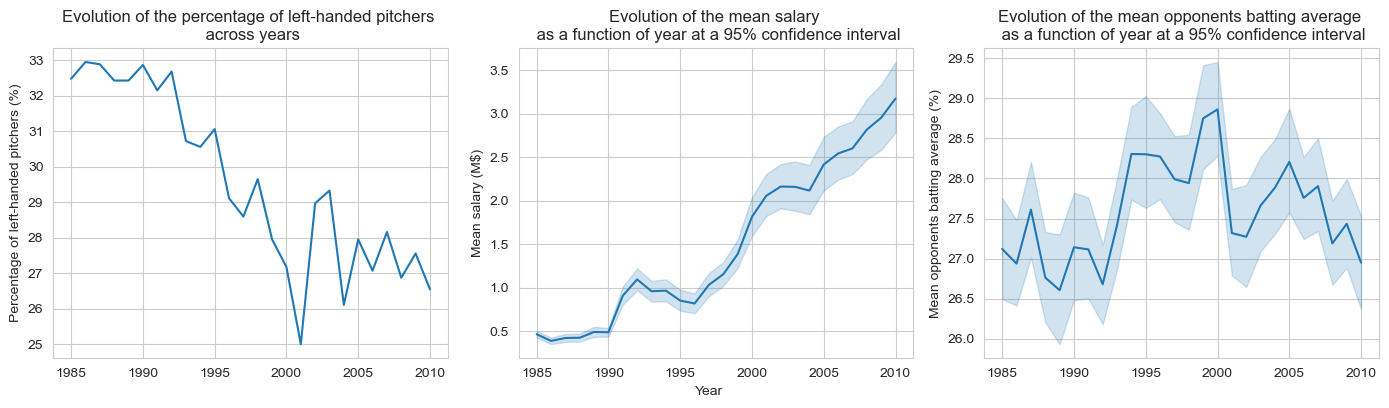

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4), sharex=True)

# plot the percentage of left-handed pitchers by year
ax[0].plot(left_handed_percentage_df)
ax[0].set_title("Evolution of the percentage of left-handed pitchers \n across years")
ax[0].set_ylabel("Percentage of left-handed pitchers (%)")

# plot the mean and 95% confidence interval salary for all pitchers by year
sns.lineplot(data=df, x="yearID", y=df.salary/1000000, estimator=np.mean, errorbar=("ci", 95), n_boot=num_boot_samples, ax=ax[1])
ax[1].set_title("Evolution of the mean salary \n as a function of year at a 95% confidence interval")
ax[1].set_ylabel("Mean salary (M$)")
ax[1].set_xlabel("")

# plot the mean and 95% confidence interval opponents batting average for all pitchers by year
sns.lineplot(data=df, x="yearID", y=df.BAOpp*100, estimator=np.mean, errorbar=("ci", 95), n_boot=num_boot_samples, ax=ax[2])
ax[2].set_title("Evolution of the mean opponents batting average \n as a function of year at a 95% confidence interval")
ax[2].set_ylabel("Mean opponents batting average (%)")
ax[2].set_xlabel("")

fig.tight_layout()
fig.text(0.5, 0, "Year")

plt.show()

In [55]:
# compute the pitchers salary average in 2007
pitchers_salary_avg_2007 = df[df.yearID == 2007].salary.mean() / 1000000

# compute the confidence interval 95% for the pitchers salary in 2007
pitchers_salary_2007_means = \
    [df[df.yearID == 2007].salary.sample(frac=1, replace=True).mean() / 1000000 for _ in range(num_boot_samples)]

# calculate 95% confidence intervals for the pitchers salary average in 2007
pitchers_salary_2007_95ci = np.percentile(pitchers_salary_2007_means, [2.5, 97.5])

In [56]:
# compute the pitchers opponents batting average average in 2007
pitchers_oba_avg_2007 = df[df.yearID == 2007].BAOpp.mean() * 100

# compute the confidence interval 95% for the pitchers opponents batting average in 2007
pitchers_oba_2007_means = \
    [df[df.yearID == 2007].BAOpp.sample(frac=1, replace=True).mean() * 100 for _ in range(num_boot_samples)]

# calculate 95% confidence intervals for the pitchers opponents batting average average in 2007
pitchers_oba_2007_95ci = np.percentile(pitchers_oba_2007_means, [2.5, 97.5])

In [65]:
# percentage of left-handed pitchers in 2007
print("Percentage of left-handed pitchers in 2007:", left_handed_percentage_df[2007].round(2), "%")
# mean salary for pitchers in 2007 in millions of dollars and 95% confidence interval
print(f"Mean salary for pitchers in 2007: {pitchers_salary_avg_2007:.3f} M$, 95% CI = ({pitchers_salary_2007_95ci[0]:.3f} M$, {pitchers_salary_2007_95ci[1]:.3f} M$)")
# mean opponents batting average for pitchers in 2007 and 95% confidence interval
print(f"Mean opponents batting average for pitchers in 2007: {pitchers_oba_avg_2007:.2f} %, 95% CI = ({pitchers_oba_2007_95ci[0]:.2f} %, {pitchers_oba_2007_95ci[1]:.2f} %)")

Percentage of left-handed pitchers in 2007: 28.16 %
Mean salary for pitchers in 2007: 2.601 M$, 95% CI = (2.303 M$, 2.907 M$)
Mean opponents batting average for pitchers in 2007: 27.90 %, 95% CI = (27.32 %, 28.49 %)


**3.3 —** Create a single plot with 10 inches of width and 4 inches of height. The plot should contain two panels: 
- Panel A: The average salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot.
- Panel B: The average opponents' batting average for left and right-handed pitchers across the years, show 95% confidence intervals in your plot.


Additionally, print, for the year 1999:
- the average salary of left-handed pitchers.
- the average opponents' batting average of right-handed pitchers.

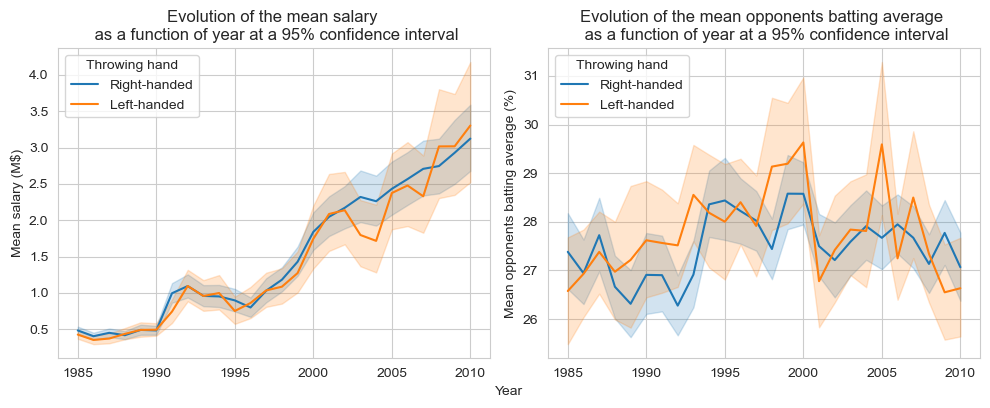

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

# plot the mean salary for each throwing hand
sns.lineplot(data=left_right_graph_df, x="yearID", y=left_right_graph_df.salary/1000000, 
             hue="Throwing hand", estimator=np.mean, errorbar=("ci", 95), n_boot=num_boot_samples, ax=ax[0])
ax[0].set_title("Evolution of the mean salary \n as a function of year at a 95% confidence interval")
ax[0].set_ylabel("Mean salary (M$)")
ax[0].legend(loc='upper left', title="Throwing hand")
ax[0].set_xlabel("")


# plot the mean opponents batting average for each throwing hand
sns.lineplot(data=left_right_graph_df, x="yearID", y=left_right_graph_df.BAOpp*100, 
             hue="Throwing hand", estimator=np.mean, errorbar=("ci", 95), n_boot=num_boot_samples, ax=ax[1])
ax[1].set_title("Evolution of the mean opponents batting average \n as a function of year at a 95% confidence interval")
ax[1].set_ylabel("Mean opponents batting average (%)")
ax[1].legend(loc='upper left', title="Throwing hand")
ax[1].set_xlabel("")

fig.tight_layout()

fig.text(0.5, 0, "Year")

plt.show()

In [59]:
# compute the mean salary for left-handed pitchers in 1999
left_handed_salaries_1999_mean = left_handed_df[left_handed_df.yearID == 1999].salary.mean() / 1000000

# compute the confidence interval 95% for the mean salary for left-handed pitchers in 1999
left_handed_salaries_1999_means = \
    [left_handed_df[left_handed_df.yearID == 1999].salary.sample(frac=1, replace=True).mean() / 1000000 for _ in range(num_boot_samples)]

# calculate 95% confidence intervals for the mean salary for left-handed pitchers in 1999
left_handed_salaries_1999_95ci = np.percentile(left_handed_salaries_1999_means, [2.5, 97.5])

In [60]:
# compute the mean for right-handed pitchers in 1999
right_handed_oba_avg_df = right_handed_df.groupby('yearID').BAOpp.mean() * 100

# compute the confidence interval 95% for the mean for right-handed pitchers in 1999
right_handed_oba_avg_1999_means = \
    [right_handed_df[right_handed_df.yearID == 1999].BAOpp.sample(frac=1, replace=True).mean() * 100 for _ in range(num_boot_samples)]

# calculate 95% confidence intervals for the mean for right-handed pitchers in 1999
right_handed_oba_avg_1999_95ci = np.percentile(right_handed_oba_avg_1999_means, [2.5, 97.5])

In [66]:
# mean salary for left-handed pitchers in 1999 in millions of dollars and 95% confidence interval
print(f"Mean salary for left-handed pitchers in 1999: {left_handed_salaries_1999_mean:.3f} M$, 95% CI = ({left_handed_salaries_1999_95ci[0]:.3f} M$, {left_handed_salaries_1999_95ci[1]:.3f} M$)")
# mean opponents batting average for right-handed pitchers in 1999 and 95% confidence interval
print(f"Mean opponents batting average for right-handed pitchers in 1999: {right_handed_oba_avg_df[1999]:.2f} %, 95% CI = ({right_handed_oba_avg_1999_95ci[0]:.2f} %, {right_handed_oba_avg_1999_95ci[1]:.2f} %)")

Mean salary for left-handed pitchers in 1999: 1.273 M$, 95% CI = (1.003 M$, 1.568 M$)
Mean opponents batting average for right-handed pitchers in 1999: 28.58 %, 95% CI = (27.83 %, 29.38 %)


**3.4 —** /Discuss:/ Contrast the results obtained in Tasks 3.1 / 3.3 / 3.3 with the results obtained in Tasks 2.7 and 2.8. Are left-handed better than right-handed pitchers? Do they earn better salaries? Explain why the analysis might have reached different results.

- In sections 2.7 and 2.8, when we used the macroaverage approach and we found a significant difference in salaries and opponents batting averages. we can interpret that when looking at the overall performance of right-handed and left-handed players there is a  significant difference.

- In sections 3.1 and 3.3, when we used the microaverage approach, we didn't find any significant differences in salaries and opponents batting averages. we can interpret that when looking at individual years separately and then aggregating the results, there are no significant differences between right-handed and left-handed players in each year, and this pattern holds when considering all years together.

- So, the difference in averaging methods explains the variation in the results. Macroaverage focuses more on the overall performance but microaverage considers individual yearly performance before aggregation.µ

**3.5 —** Before showing the final results to Mr. Russo, you pass them by Ms. Sakota once more. She looks happier now, but still looks a bit concerned. She asks you to perform a sanity check on the missing data for the period you are considering. Specifically, she is worried that there are significantly more missing salaries for left-handed pitchers or for right-handed pitchers.

- Create a plot with 10 inches of width and 4 inches of height. The plot should depict the fraction of missing salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot. 
- Print the fraction of left-handed pitchers with salary data missing for the year 2002. 
- /Discuss:/ According to the plot, are there significantly more missing salaries for left-handed pitchers?


In [62]:
# compute the fraction of missing salary data by year for left-handed pitchers
left_handed_salary_missing_data_df = \
    left_handed_df['salary'].isna().groupby(left_handed_df['yearID']).sum() / left_handed_df.groupby('yearID').size() * 100

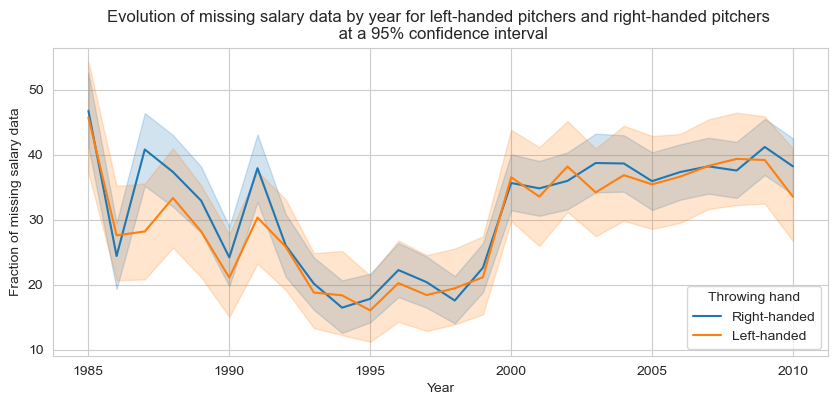

In [63]:
plt.figure(figsize=(10, 4))

# plot the fraction of missing salary data by year
sns.lineplot(data=left_right_graph_df, x="yearID", 
             y=left_right_graph_df.salary.isna()*100, hue="Throwing hand", errorbar=("ci", 95), n_boot=num_boot_samples)
plt.title("Evolution of missing salary data by year for left-handed pitchers and right-handed pitchers \n at a 95% confidence interval")
plt.ylabel("Fraction of missing salary data")
plt.xlabel("Year")
plt.legend(loc='lower right', title="Throwing hand")
plt.show()

In [64]:
# fraction of missing salary data for left-handed pitchers in 2002
print("Fraction of missing salary data for left-handed pitchers in 2002:", left_handed_salary_missing_data_df[2002].round(2), "%")

Fraction of missing salary data for left-handed pitchers in 2002: 38.17 %


When inspecting the evolution of missing salary data by year for left-handed pitchers and right-handed pitchers, we can see that the missing data percentage for left- and right-handed players follows the same pattern, so we can interpret that there is not significantly more missing salaries for left-handed pitchers, and this is normal since data collection is not correlated with the throwing hand.

**3.6 –**  /Discuss:/ If 95% of the salaries of right-handed pitchers were missing and none for the left-handed pitchers, what problem could you envision could happen downstream when you analyzed the data?

Missing data, especially when it is not missing at random as in our case, 95% of the salaries of right-handed pitchers are missing and none for the left-handed pitchers could lead to various and significant problem such as misleading conclusions, misinterpretation, or bias comparison. Right-handed pitchers could be, for example, the most known and best pitchers, and this could lead to interpreting the fact that right handed players earn more than expected.

If we only have 5% of the right hand pitchers (selected at random), this will cause a high level of uncertainty for this group. As a consequence, the confidence interval will be larger since we are much less certain about the true mean and distribution of the data.

However, if we only keep only the 5% of the right hand pitchers with the highest salaries, this will cause a bias in the data since we are only considering the best right hand pitchers. Therefore, this will indicate that there is a very significant difference between the salaries of left-handed and right-handed pitchers. And that right-handed pitchers earn more than left-handed pitchers.